In [1]:
import pandas as pd
import random

import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt


In [2]:
filename_list=['control_nm_data.csv','wc_data.csv','pop_data.csv','ic_data.csv','rock_data.csv','jazz_data.csv']
columns = [f"genre", f"combined_score", f"reading", f"working_memory"]
# all data is stored in this dictionary
mydata = {}

In [3]:
def readdata(filename, mydata):
    filename_prefix = filename.split('_data')[0]
    # we dont want to read header information and the first row is all text details we dont want
    file_df = pd.read_csv(filename, header=None, skiprows=1)
    file_df.columns = columns           
    relevant_df = file_df.iloc[:, 1:]
    # Adding to a dictionary as mydata[key] = value
    mydata[filename_prefix] = relevant_df
    

In [4]:
# read data and print   
for file in filename_list:
    filename = file
    readdata(filename, mydata)
    
    
for k, v in mydata.items():
    print(f'Data from:{k}')
    display(v)
 
print(mydata.items())

Data from:control_nm


,combined_score,reading,working_memory
0,0.343200,0.7619,2.2200
1,0.284701,0.7143,2.5089
2,0.180071,0.7143,3.9667
3,0.226190,0.9048,4.0000


Data from:wc


,combined_score,reading,working_memory
0,0.244618,0.7143,2.9200
1,0.221828,0.7143,3.2200
2,0.263737,0.9524,3.6111
3,0.214448,0.6190,2.8867


Data from:pop


,combined_score,reading,working_memory
0,0.307675,0.8095,2.6311
1,0.269409,0.6190,2.2978
2,0.311919,0.9524,3.0533
3,0.223490,0.8095,3.6222
4,0.356011,1.0000,2.8089


Data from:ic


,combined_score,reading,working_memory
0,0.270708,0.9048,3.3422
1,0.283822,0.8571,3.0200
2,0.262482,0.5238,1.9956
3,0.297404,0.9048,3.0422
4,0.236703,0.8095,3.4200


Data from:rock


,combined_score,reading,working_memory
0,0.513788,0.8095,1.5756
1,0.330688,0.4762,1.4400
2,0.331473,0.8095,2.4422
3,0.233234,0.7619,3.2667
4,0.329986,0.7619,2.3089


Data from:jazz


,combined_score,reading,working_memory
0,0.558495,0.9048,1.6200
1,0.379268,0.9524,2.5111
2,0.847137,0.8095,0.9556
3,0.255097,0.4762,1.8667


dict_items([('control_nm',    combined_score  reading  working_memory
0        0.343200   0.7619          2.2200
1        0.284701   0.7143          2.5089
2        0.180071   0.7143          3.9667
3        0.226190   0.9048          4.0000), ('wc',    combined_score  reading  working_memory
0        0.244618   0.7143          2.9200
1        0.221828   0.7143          3.2200
2        0.263737   0.9524          3.6111
3        0.214448   0.6190          2.8867), ('pop',    combined_score  reading  working_memory
0        0.307675   0.8095          2.6311
1        0.269409   0.6190          2.2978
2        0.311919   0.9524          3.0533
3        0.223490   0.8095          3.6222
4        0.356011   1.0000          2.8089), ('ic',    combined_score  reading  working_memory
0        0.270708   0.9048          3.3422
1        0.283822   0.8571          3.0200
2        0.262482   0.5238          1.9956
3        0.297404   0.9048          3.0422
4        0.236703   0.8095          3.4200

[('control_nm', 0    0.343200
1    0.284701
2    0.180071
3    0.226190
Name: combined_score, dtype: float64), ('wc', 0    0.244618
1    0.221828
2    0.263737
3    0.214448
Name: combined_score, dtype: float64), ('pop', 0    0.307675
1    0.269409
2    0.311919
3    0.223490
4    0.356011
Name: combined_score, dtype: float64), ('ic', 0    0.270708
1    0.283822
2    0.262482
3    0.297404
4    0.236703
Name: combined_score, dtype: float64), ('rock', 0    0.513788
1    0.330688
2    0.331473
3    0.233234
4    0.329986
Name: combined_score, dtype: float64), ('jazz', 0    0.558495
1    0.379268
2    0.847137
3    0.255097
Name: combined_score, dtype: float64)]


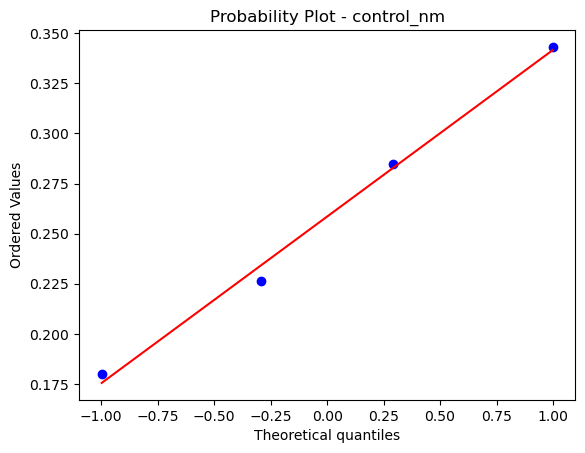

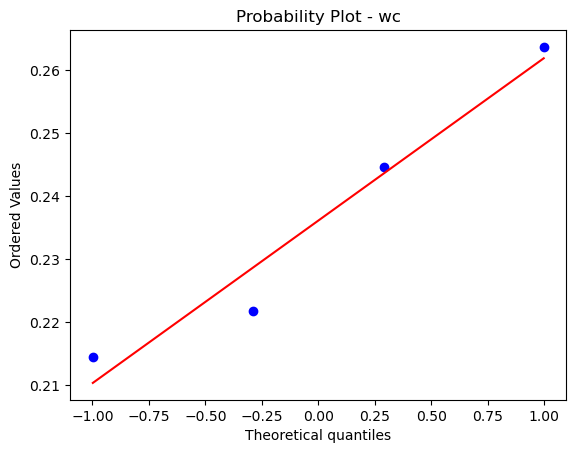

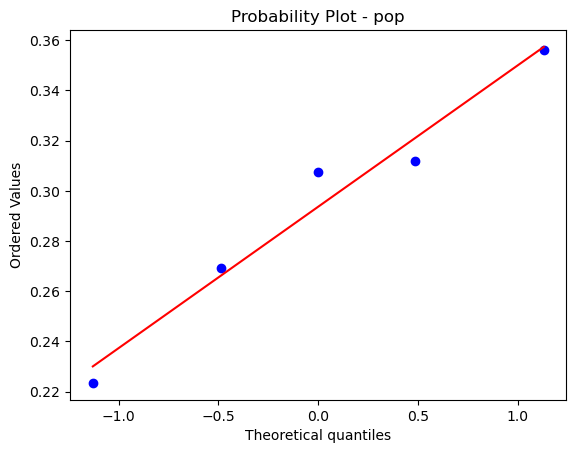

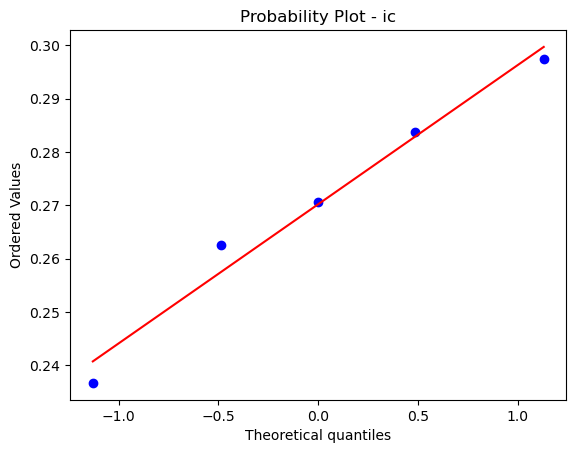

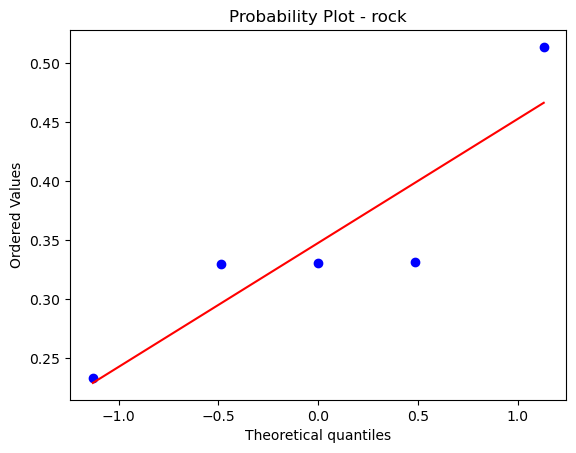

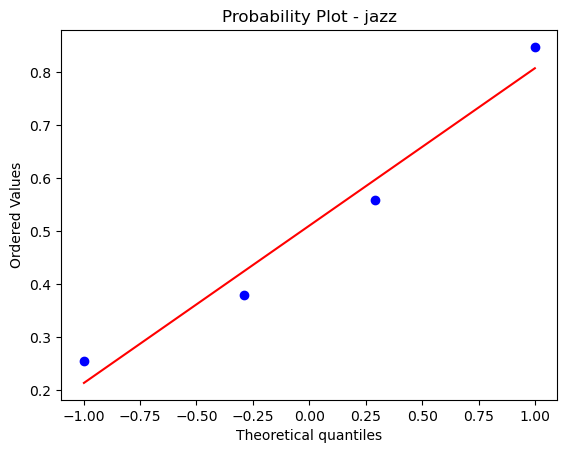

In [5]:
#Check normality for data sets
combined_scores_list = [(k, v['combined_score']) for k, v in mydata.items()]
print(combined_scores_list)

for name, each_combined_score in combined_scores_list:
    stats.probplot(each_combined_score, dist="norm", plot=plt)
    plt.title("Probability Plot - " + name )
    plt.show()

In [6]:
for k, v in mydata.items():
    print(f'Data from:{k}')
    

Data from:control_nm
Data from:wc
Data from:pop
Data from:ic
Data from:rock
Data from:jazz


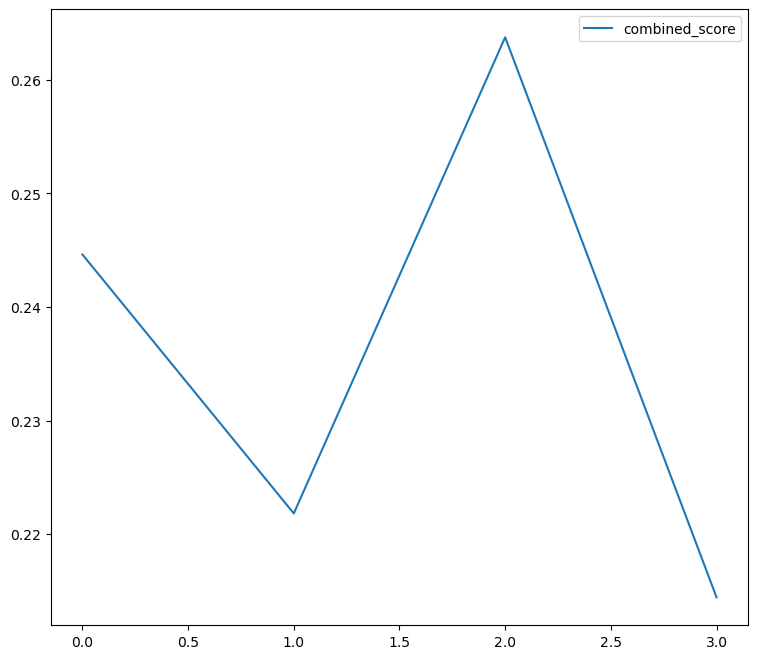

In [7]:
# plot the dataframe
mydata['wc'].plot(y=["combined_score",], kind="line", figsize=(9, 8))
 
# print bar graph
plt.show()

In [8]:
# Homogeneity of Variance: calculate ratio of the largest to the smallest sample standard deviation
std = {}
std['rock'] = mydata['rock']['combined_score'].std()
std['jazz'] = mydata['jazz']['combined_score'].std()
std['wc'] = mydata['wc']['combined_score'].std()
std['control_nm'] = mydata['control_nm']['combined_score'].std()
std['pop'] = mydata['pop']['combined_score'].std()
std['ic'] = mydata['ic']['combined_score'].std()

std_min = min(std.values())
std_max = max(std.values())
print(std)
print("Standard Dev. Min: ", std_min, "Standard Dev. Max: ", std_max, "Standard Dev. Max/Min Ratio: ", std_max/std_min)
#ratio = df.std().max / df.std().min
#ratio

{'rock': 0.10192404154412645, 'jazz': 0.25695585904074764, 'wc': 0.022426561335969, 'control_nm': 0.070841866798823, 'pop': 0.04982338644363869, 'ic': 0.022953693343486563}
Standard Dev. Min:  0.022426561335969 Standard Dev. Max:  0.25695585904074764 Standard Dev. Max/Min Ratio:  11.457657515627558


In [9]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
#x_bar = sample_df['salary'].mean()
#SSTR = sample_df.groupby('major').count() * (sample_df.groupby('major').mean() - x_bar)**2
#anova_table['SS']['Between Groups'] = SSTR['salary'].sum()